__Predicting flight delays by weather data__

The goal of this notebook is to present a comprehensive analysis conducted as part of the "Python for Data Scientists" course at ENSAE. This project  includes data collection and preprocessing, visualization, scraping and modeling. By combining exploratory analysis and machine learning, the notebook aims to provide actionable insights into how weather affects flight schedules, focusing specifically on data from JFK Airport in 2017.

**Motivation and Problematic**

Flight delays are a common inconvenience for both passengers and airlines, and while many are attributed to operational or logistical issues, weather often plays a crucial role. However, understanding and predicting these delays using weather data alone poses significant challenges.

This project seeks to address the following key questions:
- How do weather conditions correlate with flight delays?
- Can weather data reliably predict delays?
- What are the limitations of weather-based predictive models in this context?

**Executive summary**
TO BE COMPLETED

**Data collection:**

On the web, we found two useful datasets to build our algorithm.
1. *Plane data*:
   - **[Bureau of Transportation Statistics](https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr)**: Dataset containing detailed information about flights, like delays and destinations. The website interface enables to download precisely the data we want, from the variables to the period of time considered (year and month). We decided to restrict ourselves to download the data from the year 2017 only, as it takes a lot of time to download a dataset for a single month. 

2. *Weather data*:
   - **[IBM Weather Data](https://developer.ibm.com/exchanges/data/all/jfk-weather-data/)**: Weather data from JFK airport during the year 2017

**List of hypotheses**
1. A plane's delays are similarly sensitive to weather variations. We can generalize the situation for an airport to others
2. We can replaces the missing values for delays by 0 because we suppose that a delay is more likely to be registered than no delay as it creates more frustration
3. 'T' is used to indicate a quantity observed was too low to be measured, we assume it is equal to zero
4. The weather is the same for each 30-min interval of time


**Structure of the project**

1. Data Cleaning
2. Exploratory Data Analysis
3. Modeling (ML)
4. Interpretation and Insights
5. Application that predicts flight delays with the previous models
6. Conclusion

**Installations and Prerequisites**

Before running the notebook, ensure that the required Python modules are installed to guarantee smooth execution of the code. Execute the following command in your terminal or notebook cell to install the necessary libraries:

In [29]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


Importing Useful Modules

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import os
import numpy as np
from datetime import timedelta
import seaborn as sns
import matplotlib.dates as mdates
import s3fs

**Part 1: Data cleaning**

First, we download the files from leoacpr by typing the SSP Cloud username. If you do this step, please note that this can take a while because the files are heavy.

In [31]:
fs = s3fs.S3FileSystem(client_kwargs={"endpoint_url": "https://minio.lab.sspcloud.fr"})

MY_BUCKET = "leoacpr"
source_folder = f"{MY_BUCKET}/diffusion/Pre-processing"

YOUR_BUCKET = str(input("Type your bucket: \n"))

source_folder = f"{MY_BUCKET}/diffusion/Pre-processing"
files_in_source = fs.ls(source_folder)

# Copying the dataframe from leoacpr to your s3 database
for file_path_in_s3 in files_in_source:
    file_name = file_path_in_s3.split('/')[-1]  # Name of the file without the path

    # If the file already exists in your database, then it won't download it
    if fs.ls(f"{MY_BUCKET}/diffusion/Pre-processing") != fs.ls(f"{YOUR_BUCKET}/diffusion/Pre-processing"):
        file_path_for_you = f"{YOUR_BUCKET}/diffusion/Pre-processing/{file_name}"
        #import
        with fs.open(file_path_in_s3, "r") as file_in:
            df_imported = pd.read_csv(file_in)
        #export
        with fs.open(file_path_for_you, "w") as file_out:
            df_imported.to_csv(file_out)
        
        print(f"File {file_name} has been successfully copied to {file_path_for_you}")

#Create folders inside S3
if not fs.exists(f"{YOUR_BUCKET}/diffusion/Pre-processed_data"):
    fs.touch(f"{YOUR_BUCKET}/diffusion/.{Pre-processed_data}]")

#Downloading the dataframes
dataframes = {}

for files in fs.ls(f"{YOUR_BUCKET}/diffusion/Pre-processing"):
    with fs.open(files, "r") as file_in:
            df_imported = pd.read_csv(file_in)
            print(f"Downloading {files}")
    # Dictionnary of dataframes with the name of the file as a key
    dataframes[f"{files.split('/')[-1]}"] = df_imported


PermissionError: Access Denied.

Define a function that will be useful after

In [13]:
def check_nan_columns(df):
    """Checks and prints the columns containing NaN values

    Args:
        df (pd.dataframe): a dataframe
    """

    nan_columns = df.columns[df.isna().any()].tolist()
    for col in nan_columns:
        nan_count = df[col].isna().sum()
        print(f"Colonne '{col}' contient {nan_count} valeurs NaN.")

Pre-processing the planes data



In [ ]:
#Merging the monthly datasets to obtain a dataset for 2017
january_JFK = dataframes['T_ONTIME_REPORTING_january.csv'][lambda df: df["ORIGIN_AIRPORT_ID"] == 10135] 
february_JFK = dataframes['T_ONTIME_REPORTING_february.csv'][lambda df: df["ORIGIN_AIRPORT_ID"] == 10135] 
march_JFK = dataframes['T_ONTIME_REPORTING_march.csv'][lambda df: df["ORIGIN_AIRPORT_ID"] == 10135] 
april_JFK = dataframes['T_ONTIME_REPORTING_april.csv'][lambda df: df["ORIGIN_AIRPORT_ID"] == 10135] 
may_JFK = dataframes['T_ONTIME_REPORTING_may.csv'][lambda df: df["ORIGIN_AIRPORT_ID"] == 10135] 
june_JFK = dataframes['T_ONTIME_REPORTING_june.csv'][lambda df: df["ORIGIN_AIRPORT_ID"] == 10135] 
july_JFK = dataframes['T_ONTIME_REPORTING_july.csv'][lambda df: df["ORIGIN_AIRPORT_ID"] == 10135] 
august_JFK = dataframes['T_ONTIME_REPORTING_august.csv'][lambda df: df["ORIGIN_AIRPORT_ID"] == 10135] 
september_JFK = dataframes['T_ONTIME_REPORTING_september.csv'][lambda df: df["ORIGIN_AIRPORT_ID"] == 10135] 
october_JFK = dataframes['T_ONTIME_REPORTING_october.csv'][lambda df: df["ORIGIN_AIRPORT_ID"] == 10135] 
november_JFK = dataframes['T_ONTIME_REPORTING_november.csv'][lambda df: df["ORIGIN_AIRPORT_ID"] == 10135] 
december_JFK = dataframes['T_ONTIME_REPORTING_december.csv'][lambda df: df["ORIGIN_AIRPORT_ID"] == 10135] 
#Total size = 2138
year = [january_JFK, february_JFK, march_JFK, april_JFK, may_JFK, june_JFK, july_JFK, august_JFK, september_JFK, october_JFK, november_JFK, december_JFK]
JFK_2017 = pd.concat(year, ignore_index=True)
JFK_2017.drop(columns=['Unnamed: 0'], inplace=True)
#print(JFK_2017)

#Setting the rights data types
#print(JFK_2017.info())
JFK_2017['FL_DATE'] = pd.to_datetime(JFK_2017['FL_DATE'])

#Hypothesis : we can replaces the missing values for delays by 0 because we suppose that a delay is more likely to be registered than no delay because it creates more frustration
JFK_2017['WEATHER_DELAY'] = JFK_2017['WEATHER_DELAY'].fillna(0)
JFK_2017['DEP_DELAY'] = JFK_2017['DEP_DELAY'].fillna(0)
JFK_2017['CARRIER_DELAY'] = JFK_2017['CARRIER_DELAY'].fillna(0)
JFK_2017['WEATHER_DELAY'] = JFK_2017['WEATHER_DELAY'].fillna(0)
JFK_2017['ARR_DELAY'] = JFK_2017['ARR_DELAY'].fillna(0)

#Removing NaN per rows
check_nan_columns(JFK_2017)
#'DEP_TIME' has 36  NaN.
#'ARR_TIME' has 39 valeurs NaN.
JFK_2017 = JFK_2017.dropna(axis=0)
check_nan_columns(JFK_2017) #nothing --> no more NaN
#print(len(JFK_2017)) 
#1919

#Combining departure time information to obtain a column with year, month, day, hour, minute for departure
#'DEP_TIME' contains str with numbers indicating the hours and minutes through the format "hhmm"
JFK_2017['DEP_TIME'] = JFK_2017['DEP_TIME'].astype(str).str.replace(r'\.0$', '', regex=True)
JFK_2017['DEP_TIME'] = JFK_2017['DEP_TIME'].astype(str).str.zfill(4)  # Ensure it's 4 digits
JFK_2017['Hours'] = JFK_2017['DEP_TIME'].str[:2].astype(int)  # Get hours as integer
JFK_2017['Minutes'] = JFK_2017['DEP_TIME'].str[2:].astype(int)  # Get minutes as integer
JFK_2017['departure_time'] = pd.to_timedelta(JFK_2017['Hours'], unit='h') + pd.to_timedelta(JFK_2017['Minutes'], unit='m')
JFK_2017['Full_Departure_Datetime'] = JFK_2017['FL_DATE'] + JFK_2017['departure_time']
JFK_2017.drop(['Hours', 'Minutes', 'departure_time'], axis=1, inplace=True)
#print(JFK_2017[['FL_DATE', 'DEP_TIME', 'Full_Departure_Datetime']].head())

#Isolating the data for machine learning 
JFK_2017_no_number = JFK_2017[['Full_Departure_Datetime', 'FL_DATE','OP_UNIQUE_CARRIER','OP_CARRIER_AIRLINE_ID','OP_CARRIER','TAIL_NUM','OP_CARRIER_FL_NUM','ORIGIN_AIRPORT_ID','ORIGIN_AIRPORT_SEQ_ID','ORIGIN_CITY_MARKET_ID','DEST_AIRPORT_ID','DEST_CITY_MARKET_ID','DEST', 'DEP_TIME','ARR_TIME']]
JFK_2017_number = JFK_2017[['DEP_DELAY','ARR_DELAY','CANCELLED','CARRIER_DELAY','WEATHER_DELAY','Full_Departure_Datetime']]
JFK_2017_number['CANCELLED'] = JFK_2017_number['CANCELLED'].astype(int)
#print(JFK_2017_number.info())

#Exporting the dataset for JFK planes
with fs.open(f"{YOUR_BUCKET}/diffusion/Pre-processed_data/JFK_2017.csv", "w") as path:
    JFK_2017.to_csv(path)

with fs.open(f"{YOUR_BUCKET}/diffusion/Pre-processed_data/JFK_2017_no_number.csv", "w") as path:
    JFK_2017_no_number.to_csv(path)

with fs.open(f"{YOUR_BUCKET}/diffusion/Pre-processed_data/JFK_2017_number.csv", "w") as path:
    JFK_2017_number.to_csv(path)

/tmp/ipykernel_22411/1635564088.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  JFK_2017['FL_DATE'] = pd.to_datetime(JFK_2017['FL_DATE'])
/tmp/ipykernel_22411/1635564088.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JFK_2017_number['CANCELLED'] = JFK_2017_number['CANCELLED'].astype(int)


Colonne 'DEP_TIME' contient 38 valeurs NaN.
Colonne 'ARR_TIME' contient 41 valeurs NaN.


Pre-processing the weather data


In [ ]:
#We take only the data for the year 2017
weather = dataframes['jfk_weather.csv']
#print(weather.head())
weather.drop(columns=['Unnamed: 0.1'], inplace=True)


weather['DATE'] = pd.to_datetime(weather['DATE'])
weather_2017 = weather[weather['DATE'].dt.year == 2017]
#print(weather_2017.head())
#print(weather_2017.tail())
#print(weather.info()) 
#90 columns



#Columns with "Monthly", "Hourly" ou "Daily" contains only one value for the unit they represent.
# for example for a monthly columns, only the last day of the corresponding month contains a value
# We need to extend this

# Extracting the columns "Monthly", "Hourly" ou "Daily"
monthly_columns = [col for col in weather_2017.columns if 'Monthly' in col]
hourly_columns = [col for col in weather_2017.columns if 'HOURLY' in col]
daily_columns = [col for col in weather_2017.columns if 'DAILY' in col]

# Conversion in datetime type
weather_2017['YearMonth'] = weather_2017['DATE'].dt.to_period('M')  # Extraire l'année et le mois
weather_2017['YearDayHour'] = weather_2017['DATE'].dt.to_period('H')  # Extraire l'année, jour et heure
weather_2017['YearDay'] = weather_2017['DATE'].dt.to_period('D')  # Extraire l'année et jour

# Filling the NaN values
def fill_periodic_values(df, columns, period_key):
    for col in columns:
        if col in df.columns:
            # Utiliser les groupes par période pour remplir les NaN avec ffill et bfill
            df[col] = df.groupby(period_key)[col].transform(lambda group: group.ffill().bfill())

fill_periodic_values(weather_2017, monthly_columns, 'YearMonth')
fill_periodic_values(weather_2017, daily_columns, 'YearDay')
fill_periodic_values(weather_2017, hourly_columns, 'YearDayHour')

# Deleting the temporary columns
weather_2017.drop(columns=['YearMonth', 'YearDayHour', 'YearDay'], inplace=True)


# Veryfying other columns with NaN
     
# Some variables have value -9999 instead of NaN
# We replace them by NaN to remove them later
weather_2017 = weather_2017.replace(-9999, np.nan)

check_nan_columns(weather_2017)

# We remove the columns containg more than 1000 NaN values
weather_2017 = weather_2017.dropna(axis=1, thresh=len(weather_2017) - 1000)
check_nan_columns(weather_2017)
#print(len(weather_2017)) #13201
weather_2017 = weather_2017.dropna(axis=0)
check_nan_columns(weather_2017) #nothing
#print(len(weather_2017)) #13027


#Deletion of useless columns (because of weather encoding standards (str whose meaning is not easily retrievable), complex units like angles, no variance, etc...)
inutile = ['STATION','STATION_NAME','ELEVATION','LATITUDE','LONGITUDE', 'REPORTTPYE', 'HOURLYSKYCONDITIONS', 'HOURLYWindDirection', 'MonthlyDaysWithLT0Temp', 'DAILYSustainedWindDirection']
weather_2017.drop(columns=inutile, inplace=True)

#Hyptohesis: 'T' is used to indicate a quantity observed was too low to be measured, we assume it is equal to zero
weather_2017 = weather_2017.replace('T', 0)

#Some variables have values equal to a number followed by a character, we keep only the number by using regex
for col in weather_2017.columns:
    weather_2017[col] = weather_2017[col].replace(r'(\d+(\.\d+)?)([^\d\s]+)$', r'\1', regex=True)


# We delete columns that represents the same thing but with different units (like celsius VS Farenheit)
# we keep Fahrenheit because some variables do not have the celsius equivalent (American weather)
Celsius = ['HOURLYDRYBULBTEMPC', 'HOURLYWETBULBTEMPC', 'HOURLYDewPointTempC']
weather_2017.drop(columns=Celsius, inplace=True)

#We set all variables to be float, expect time
#delete the two first columns because it starts with Unnamed 0 and DATE to convert the rest to float
weather_2017 = pd.concat([weather_2017[['DATE']], weather_2017.iloc[:, 2:].astype(float)], axis=1)

#print(weather_2017.info())
#print(weather_2017.head())

with fs.open(f"{YOUR_BUCKET}/diffusion/Pre-processed_data/weather_2017.csv", "w") as path:
    weather_2017.to_csv(path)

/tmp/ipykernel_22411/3998382021.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_2017['YearMonth'] = weather_2017['DATE'].dt.to_period('M')  # Extraire l'année et le mois
/tmp/ipykernel_22411/3998382021.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weather_2017['YearDayHour'] = weather_2017['DATE'].dt.to_period('H')  # Extraire l'année, jour et heure
/tmp/ipykernel_22411/3998382021.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w

Colonne 'HOURLYSKYCONDITIONS' contient 5 valeurs NaN.
Colonne 'HOURLYVISIBILITY' contient 5 valeurs NaN.
Colonne 'HOURLYPRSENTWEATHERTYPE' contient 10553 valeurs NaN.
Colonne 'HOURLYWETBULBTEMPF' contient 13 valeurs NaN.
Colonne 'HOURLYWETBULBTEMPC' contient 13 valeurs NaN.
Colonne 'HOURLYDewPointTempF' contient 4 valeurs NaN.
Colonne 'HOURLYDewPointTempC' contient 4 valeurs NaN.
Colonne 'HOURLYRelativeHumidity' contient 4 valeurs NaN.
Colonne 'HOURLYWindGustSpeed' contient 11048 valeurs NaN.
Colonne 'HOURLYStationPressure' contient 9 valeurs NaN.
Colonne 'HOURLYPressureTendency' contient 4379 valeurs NaN.
Colonne 'HOURLYPressureChange' contient 7324 valeurs NaN.
Colonne 'HOURLYSeaLevelPressure' contient 2 valeurs NaN.
Colonne 'HOURLYPrecip' contient 5 valeurs NaN.
Colonne 'DAILYAverageRelativeHumidity' contient 1415 valeurs NaN.
Colonne 'DAILYAverageDewPointTemp' contient 1016 valeurs NaN.
Colonne 'DAILYAverageWetBulbTemp' contient 1016 valeurs NaN.
Colonne 'DAILYWeather' contient 614

Then, we merge the two datasets, and export specific dataframes for Data Exploration and Machine Learning

In [ ]:
# Conversion of data time to numpy.datetime64 type to accelerate comparisons 
departure_times = JFK_2017_number['Full_Departure_Datetime'].values.astype('datetime64[m]')  # minutes
weather_times = weather_2017['DATE'].values.astype('datetime64[m]')  # minutes

#Hypothesis: the weather is the same for each 30-min interval of time
tolerance = np.timedelta64(30, 'm')

merged_rows = []

#we want to find the minimum time difference between the plane departure and the measured weather
for departure_time in departure_times:
    time_differences = np.abs(departure_time - weather_times)
    closest_index = np.argmin(time_differences)
    
    # If the time difference is beow the tolerance, we combine the information from JFK_numbers and weather_2017
    if time_differences[closest_index] <= tolerance:
        closest_weather_row = weather_2017.iloc[closest_index]
        jfk_row = JFK_2017_number.iloc[np.where(departure_times == departure_time)[0][0]]  # find the corresponding row
        merged_row = pd.concat([jfk_row, closest_weather_row], axis=0)
        merged_rows.append(merged_row)

# Combining all the rows that were accepted
merged_df = pd.DataFrame(merged_rows, columns=np.concatenate([JFK_2017_number.columns, weather_2017.columns]))

#print(merged_df['Full_Departure_Datetime'])
#only about 10 rows were lost for a tolerance of 30min: acceptable 

# Uploading the data
merged_df.rename(columns={'DATE': 'DATE_weather'}, inplace=True)
with fs.open(f"{YOUR_BUCKET}/diffusion/Pre-processed_data/plane_weather.csv", "w") as path:
    merged_df.to_csv(path)

check_nan_columns(merged_df)
#print(merged_df.info())

plane_weather_for_ML = merged_df.drop(columns=['Full_Departure_Datetime', 'DATE_weather'])
with fs.open(f"{YOUR_BUCKET}/diffusion/Pre-processed_data/plane_weather_for_ML.csv", "w") as path:
    plane_weather_for_ML.to_csv(path)

#print(plane_weather_for_ML.info())

**Part 2: Exploratory statistics**

In this part, we analyze how the different variables behave and how they are linked. The goal is to pave the way to machine learning. 

We load the data first

In [ ]:
#Download the files from leoacpr by typing your SSP Cloud username
#This can take a while because the files are heavy

fs = s3fs.S3FileSystem(client_kwargs={"endpoint_url": "https://minio.lab.sspcloud.fr"})

MY_BUCKET = "leoacpr"
source_folder = f"{MY_BUCKET}/diffusion/Pre-processing"
files_in_source = fs.ls(source_folder)

#Downloading the dataframes
dataframes = {}

for files in fs.ls(f"{MY_BUCKET}/diffusion/Pre-processed_data"):
    with fs.open(files, "r") as file_in:
            df_imported = pd.read_csv(file_in)
            print(f"Downloading {files}")
    # Dictionnary of dataframes with the name of the file as a key
    dataframes[f"{files.split('/')[-1]}"] = df_imported

#Load the data and remove useless columns
plane_weather = dataframes['plane_weather.csv']
plane_weather_for_ML = dataframes['plane_weather_for_ML.csv']
JFK_2017_number = dataframes['JFK_2017_number.csv']
weather_2017 = dataframes['weather_2017.csv']
plane_weather.drop(columns=['Unnamed: 0'], inplace=True)
plane_weather_for_ML.drop(columns=['Unnamed: 0'], inplace=True)
JFK_2017_number.drop(columns=['Unnamed: 0'], inplace=True)
weather_2017.drop(columns=['Unnamed: 0'], inplace=True)

plane_weather['Full_Departure_Datetime'] = pd.to_datetime(plane_weather['Full_Departure_Datetime'])
plane_weather['DATE_weather'] = pd.to_datetime(plane_weather['DATE_weather'])


Step 1: We observe how the different variables behave without paying attention to their interactions

Mean delays per month

[]

<Figure size 1000x600 with 0 Axes>

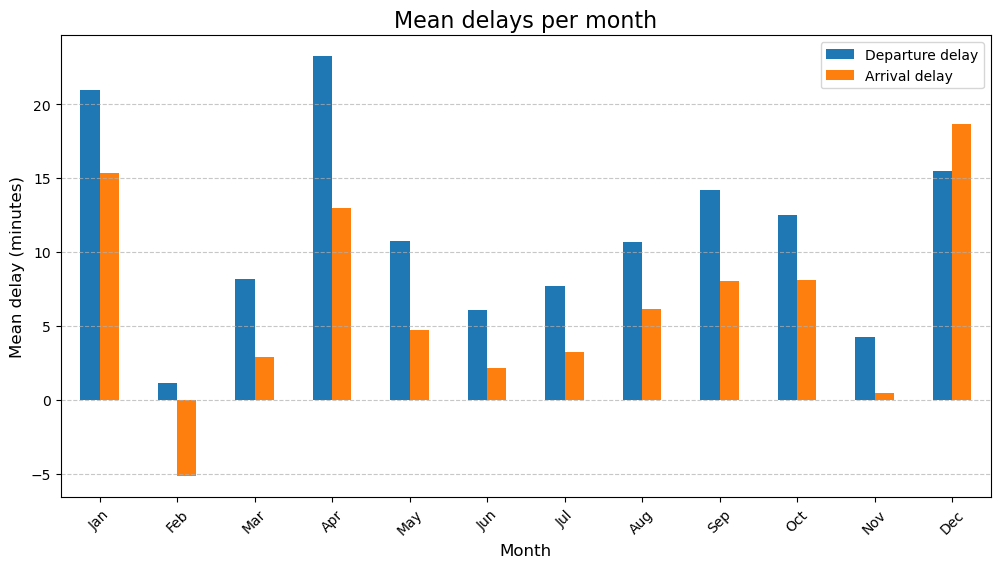

In [ ]:
plane_weather['Month'] = plane_weather['Full_Departure_Datetime'].dt.month
monthly_delays = plane_weather.groupby('Month')[['DEP_DELAY', 'ARR_DELAY']].mean()
plt.figure(figsize=(10, 6))
monthly_delays.plot(kind='bar', figsize=(12, 6))
plt.title("Mean delays per month", fontsize=16)
plt.ylabel("Mean delay (minutes)", fontsize=12)
plt.xlabel("Month", fontsize=12)
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(["Departure delay", "Arrival delay"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.savefig('Avions-Retard-et-Meteo/2_Data_exploration/pictures/1_mean_delays.png')
plt.plot()

Distribution of departure delays

[]

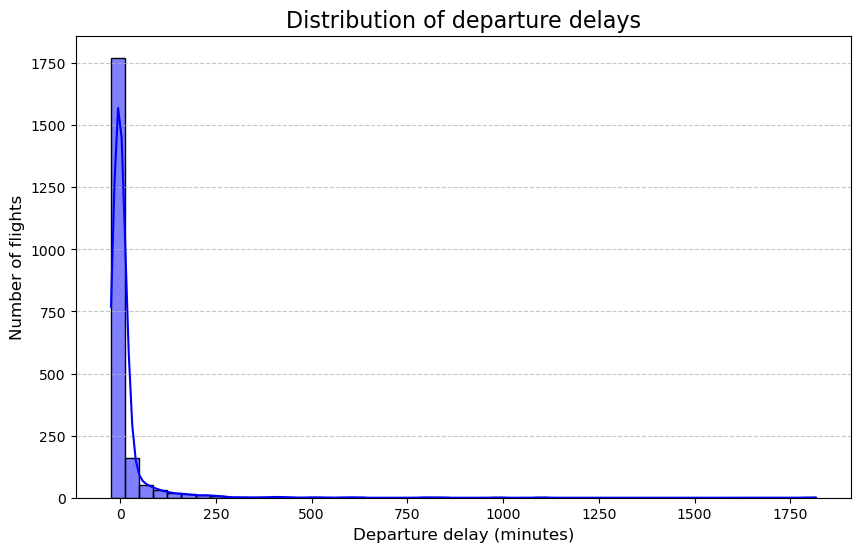

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(plane_weather['DEP_DELAY'], bins=50, kde=True, color='blue', edgecolor='black')
plt.title("Distribution of departure delays", fontsize=16)
plt.xlabel("Departure delay (minutes)", fontsize=12)
plt.ylabel("Number of flights", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.savefig('Avions-Retard-et-Meteo/2_Data_exploration/pictures/2_distribution_delays.png')
plt.plot()

Distribution of weather delays

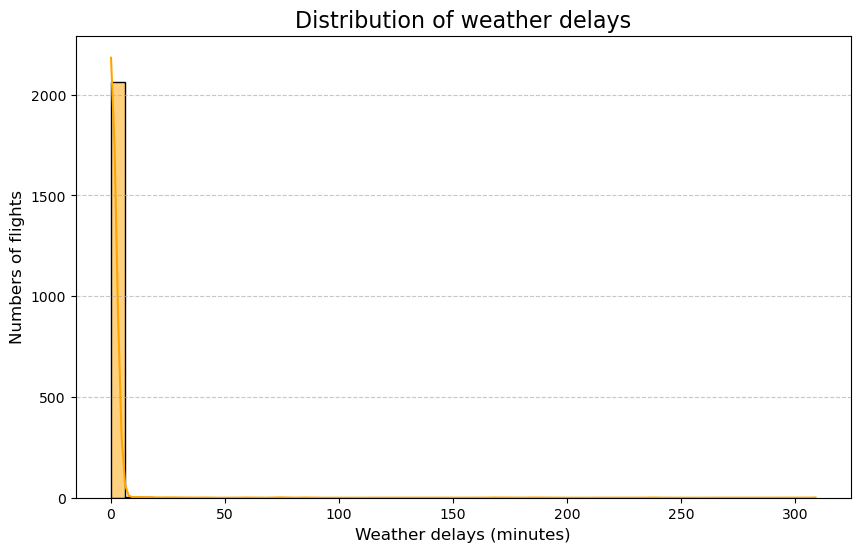

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(plane_weather['WEATHER_DELAY'], bins=50, kde=True, color='orange', edgecolor='black')
plt.title("Distribution of weather delays", fontsize=16)
plt.xlabel("Weather delays (minutes)", fontsize=12)
plt.ylabel("Numbers of flights", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.savefig('Avions-Retard-et-Meteo/2_Data_exploration/pictures/3_Distrib_weather_delays.png')
plt.show()

Sum of weather delays per month

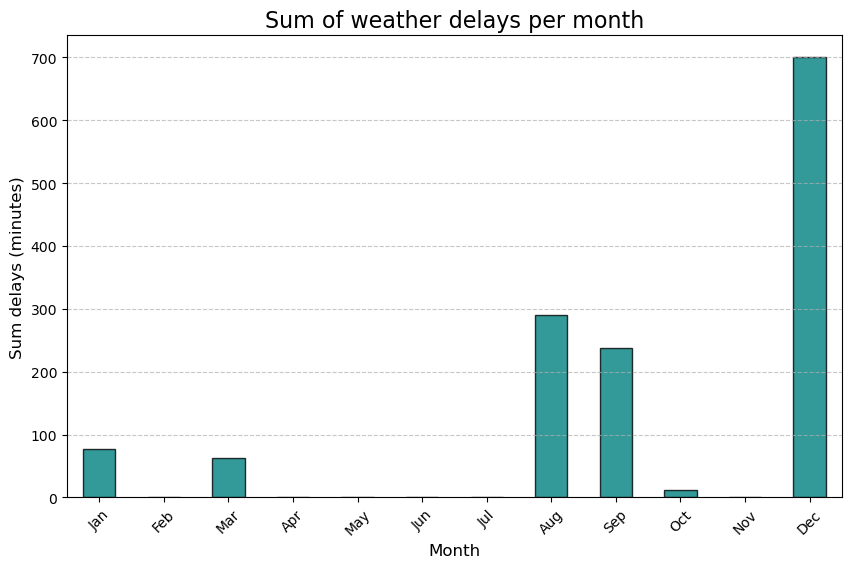

In [27]:
weather_delay_monthly = plane_weather.groupby('Month')['WEATHER_DELAY'].sum()
plt.figure(figsize=(10, 6))
weather_delay_monthly.plot(kind='bar', color='teal', alpha=0.8, edgecolor='black')
plt.title("Sum of weather delays per month", fontsize=16)
plt.ylabel("Sum delays (minutes)", fontsize=12)
plt.xlabel("Month", fontsize=12)
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.savefig('Avions-Retard-et-Meteo/2_Data_exploration/pictures/4_sum_weather_delays.png')
plt.show()
plane_weather.drop(columns=['Month'], inplace=True)

Proportions of delays

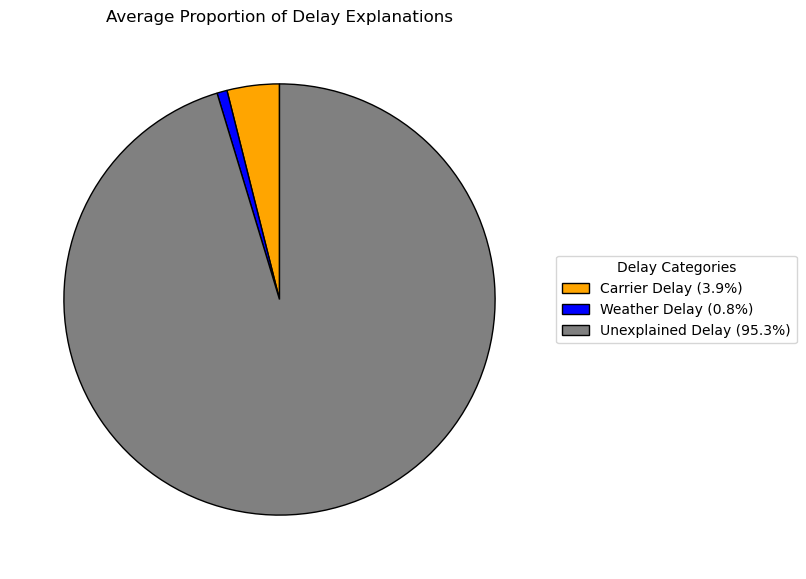

In [32]:
# Calculate the ratio of delays explained by CARRIER_DELAY, WEATHER_DELAY, and unexplained delays
plane_weather['carrier_delay_ratio'] = plane_weather['CARRIER_DELAY'] / plane_weather['DEP_DELAY']
plane_weather['weather_delay_ratio'] = plane_weather['WEATHER_DELAY'] / plane_weather['DEP_DELAY']
plane_weather['unexplained_delay_ratio'] = 1 - (plane_weather['carrier_delay_ratio'] + plane_weather['weather_delay_ratio'])

# Calculate the mean proportion of each type of delay
mean_carrier_delay = plane_weather['carrier_delay_ratio'].mean()
mean_weather_delay = plane_weather['weather_delay_ratio'].mean()
mean_unexplained_delay = plane_weather['unexplained_delay_ratio'].mean()

sizes = [mean_carrier_delay, mean_weather_delay, mean_unexplained_delay]
labels = ['Carrier Delay', 'Weather Delay', 'Unexplained Delay']
colors = ['orange', 'blue', 'gray']

plt.figure(figsize=(11, 7))
wedges, texts = plt.pie(sizes, colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'}, labels=None)
percentages = [f'{size / sum(sizes) * 100:.1f}%' for size in sizes]
legend_labels = [f'{label} ({percentage})' for label, percentage in zip(labels, percentages)]
plt.title('Average Proportion of Delay Explanations')
plt.legend(wedges, legend_labels, title="Delay Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10)
plt.title('Average Proportion of Delay Explanations')
#plt.savefig('Avions-Retard-et-Meteo/2_Data_exploration/pictures/5_Proportions_of_delays.png')
plt.plot()
plane_weather = plane_weather.drop(columns=['carrier_delay_ratio', 'weather_delay_ratio', 'unexplained_delay_ratio'])

Weather trends for the year 2017

[]

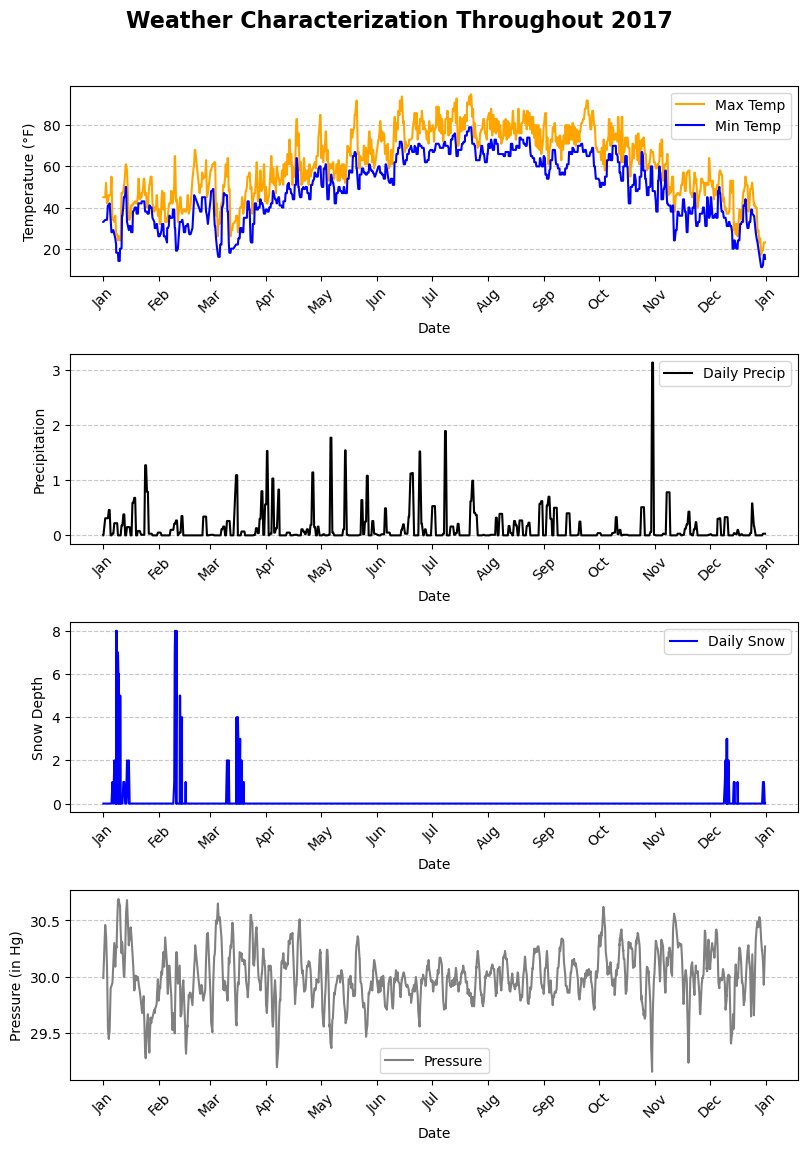

In [33]:
plt.figure(figsize=(8.27, 11.69))  # A4 size (in inches)
plt.suptitle('Weather Characterization Throughout 2017', fontsize=16, fontweight='bold')

# Function to format subplots
def format_subplot(ax, data, x_column, y_column, label, color, ylabel):
    sns.lineplot(data=data, x=x_column, y=y_column, label=label, color=color, ax=ax)
    ax.set_xlabel('Date')
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Display months
    ax.xaxis.set_major_locator(mdates.MonthLocator())  # Tick every month
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

ax1 = plt.subplot(4, 1, 1)
format_subplot(ax1, plane_weather, 'Full_Departure_Datetime', 'DAILYMaximumDryBulbTemp', 'Max Temp', 'orange', 'Temperature (°F)')
sns.lineplot(data=plane_weather, x='Full_Departure_Datetime', y='DAILYMinimumDryBulbTemp', label='Min Temp', color='blue', ax=ax1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax2 = plt.subplot(4, 1, 2)
format_subplot(ax2, plane_weather, 'Full_Departure_Datetime', 'DAILYPrecip', 'Daily Precip', 'black', 'Precipitation')
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax3 = plt.subplot(4, 1, 3)
format_subplot(ax3, plane_weather, 'Full_Departure_Datetime', 'DAILYSnowDepth', 'Daily Snow', 'blue', 'Snow Depth')
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax4 = plt.subplot(4, 1, 4)
format_subplot(ax4, plane_weather, 'Full_Departure_Datetime', 'HOURLYStationPressure', 'Pressure', 'gray', 'Pressure (in Hg)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to avoid title overlap
#plt.savefig('Avions-Retard-et-Meteo/2_Data_exploration/pictures/6_weather_2017_summary.png', dpi=300)
plt.plot()

Month by month weather

/tmp/ipykernel_22411/1137478392.py:29: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout for title


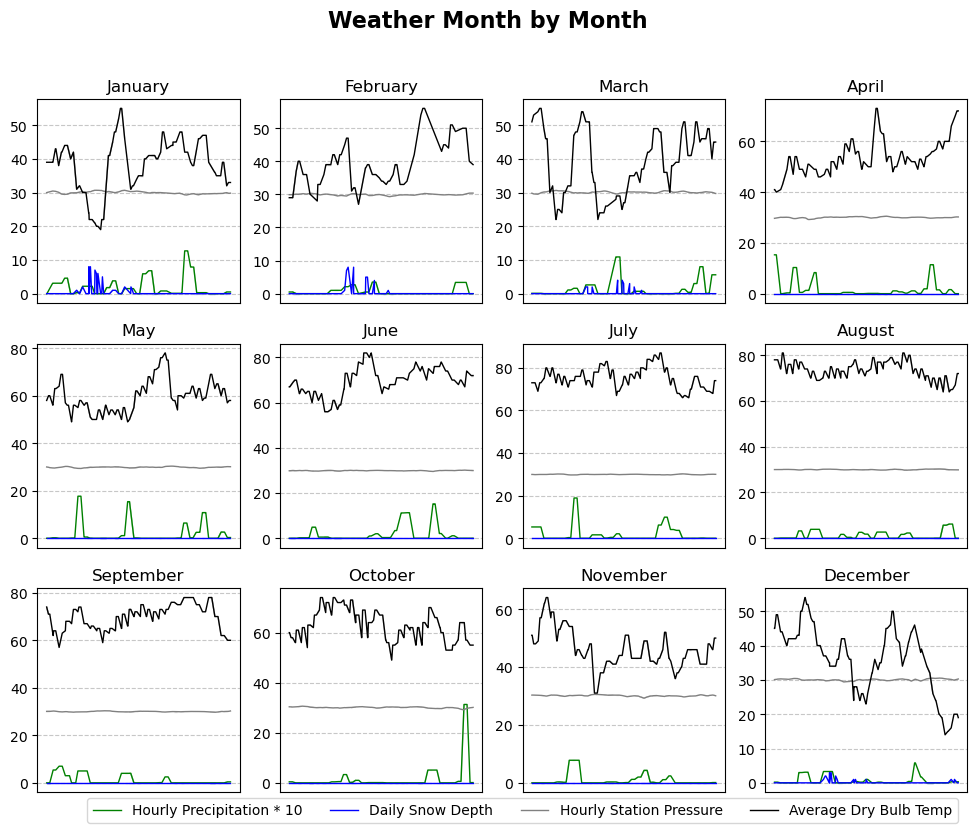

In [34]:
plt.figure(figsize=(12, 9))

# Function to format subplots
def format_subplot(ax, data, x_column, y_columns, labels, colors, ylabel):
    for y_col, label, color in zip(y_columns, labels, colors):
        sns.lineplot(data=data, x=x_column, y=y_col, label=label, color=color, ax=ax, linewidth=1)
    ax.set_ylabel(ylabel).set_visible(False)
    ax.legend().set_visible(False)
    ax.set_xlabel('')  # Delete x-axis label
    ax.xaxis.set_ticks([])  # Hide x-axis ticks

plane_weather['DAILYPrecip'] = plane_weather['DAILYPrecip']*10 #to show it more visibly on the graph
# List of months and corresponding colors
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
colors = ['green', 'blue', 'grey', 'black']
labels = ['Hourly Precipitation * 10', 'Daily Snow Depth', 'Hourly Station Pressure', 'Average Dry Bulb Temp']

# Loop over each month to create the subplots
for i, month in enumerate(months):
    month_data = plane_weather[plane_weather['DATE_weather'].dt.month == i + 1]
    ax = plt.subplot(3, 4, i+1)
    format_subplot(ax, month_data, 'DATE_weather', ['DAILYPrecip', 'DAILYSnowDepth', 'HOURLYStationPressure', 'DAILYAverageDryBulbTemp'], labels, colors, 'Values')
    ax.set_title(f'{month}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
plt.suptitle('Weather Month by Month', fontsize=16, fontweight='bold')

plt.legend(loc='center', bbox_to_anchor=(-1.2, -0.09), ncol=4) 
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout for title

#plt.savefig('Avions-Retard-et-Meteo/2_Data_exploration/pictures/7_month_by_month.png', dpi=300)
plt.plot()

plane_weather['DAILYPrecip'] = plane_weather['DAILYPrecip']/10 #to remove the modification

Step 2: Visualization of the variables interactions 

Correlation matrix

[]

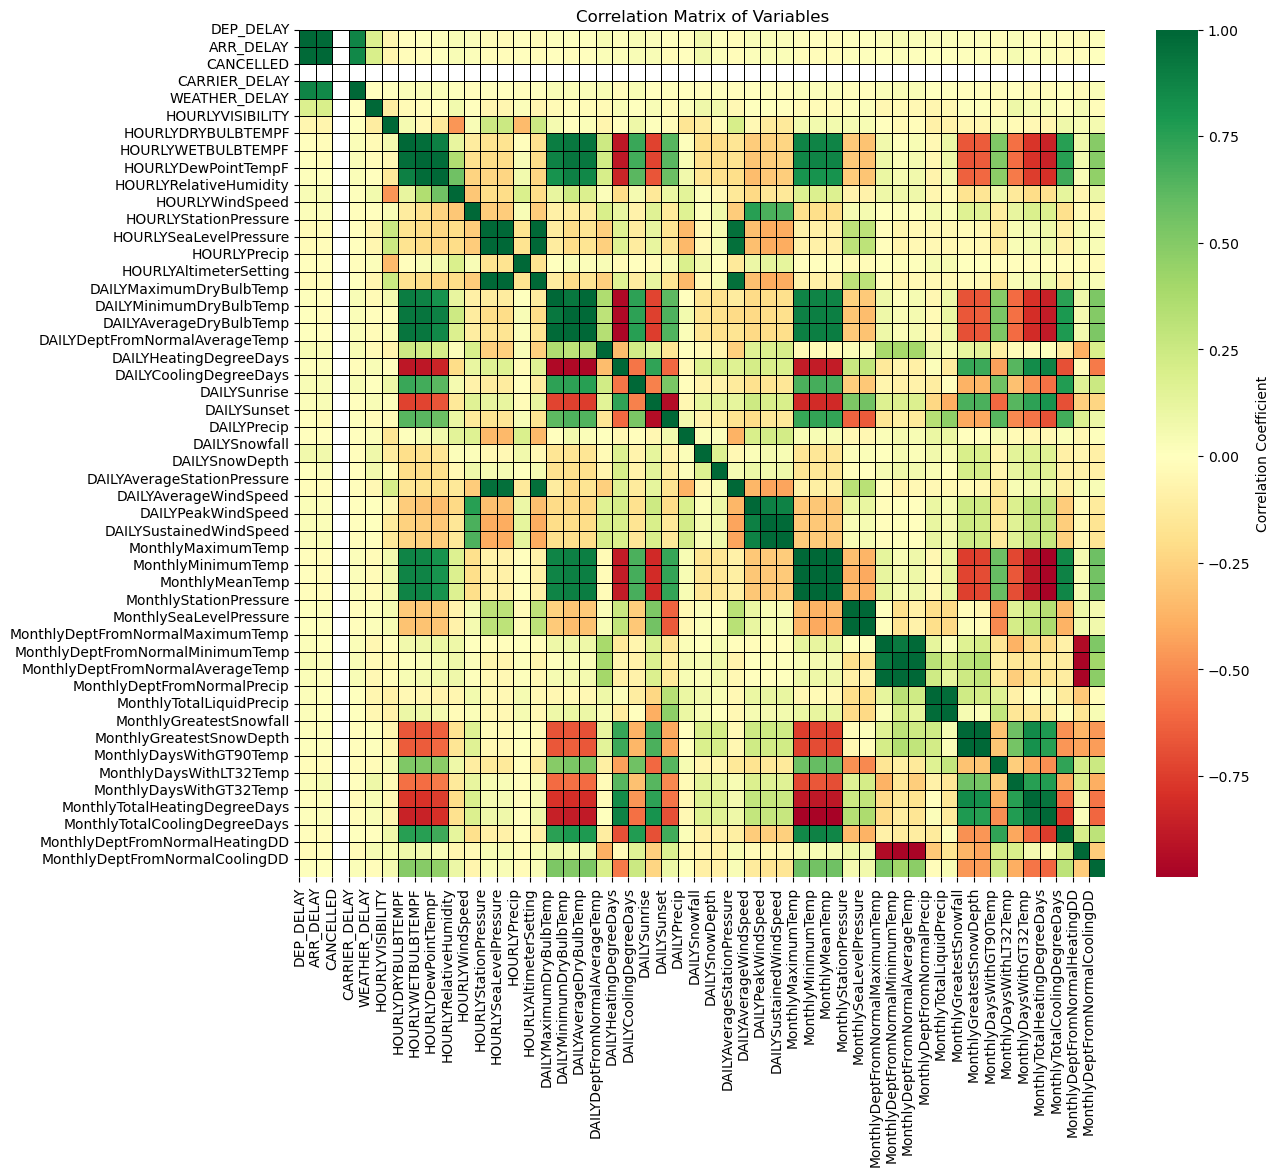

In [35]:
corr_matrix = plane_weather_for_ML.corr()
plt.figure(figsize=(13, 11))
sns.heatmap(corr_matrix, annot=False, cmap='RdYlGn', center=0, cbar_kws={'label': 'Correlation Coefficient'}, linewidths=0.4, linecolor='black')
ticks = np.arange(len(plane_weather_for_ML.columns))

plt.xticks(ticks=np.arange(len(plane_weather_for_ML.columns)), labels=plane_weather_for_ML.columns, rotation=90)
plt.yticks(ticks=np.arange(len(plane_weather_for_ML.columns)), labels=plane_weather_for_ML.columns, rotation=0)

plt.title('Correlation Matrix of Variables')
#plt.savefig('Avions-Retard-et-Meteo/2_Data_exploration/pictures/8_Corr_matrix.png', dpi=300)
plt.plot()

We plot several interactions between different variables, except the variables with strong correlation

Variables: ARR_DELAY & DEP_DELAY, Corrélation: 0.98
Variables: CARRIER_DELAY & DEP_DELAY, Corrélation: 0.87
Variables: CARRIER_DELAY & ARR_DELAY, Corrélation: 0.86
Variables: HOURLYWETBULBTEMPF & HOURLYDRYBULBTEMPF, Corrélation: 0.97
Variables: HOURLYDewPointTempF & HOURLYDRYBULBTEMPF, Corrélation: 0.88
Variables: HOURLYDewPointTempF & HOURLYWETBULBTEMPF, Corrélation: 0.97
Variables: HOURLYSeaLevelPressure & HOURLYStationPressure, Corrélation: 1.00
Variables: HOURLYAltimeterSetting & HOURLYStationPressure, Corrélation: 1.00
Variables: HOURLYAltimeterSetting & HOURLYSeaLevelPressure, Corrélation: 1.00
Variables: DAILYMaximumDryBulbTemp & HOURLYDRYBULBTEMPF, Corrélation: 0.90
Variables: DAILYMaximumDryBulbTemp & HOURLYWETBULBTEMPF, Corrélation: 0.88
Variables: DAILYMaximumDryBulbTemp & HOURLYDewPointTempF, Corrélation: 0.81
Variables: DAILYMinimumDryBulbTemp & HOURLYDRYBULBTEMPF, Corrélation: 0.93
Variables: DAILYMinimumDryBulbTemp & HOURLYWETBULBTEMPF, Corrélation: 0.94
Variables: DAILY

[]

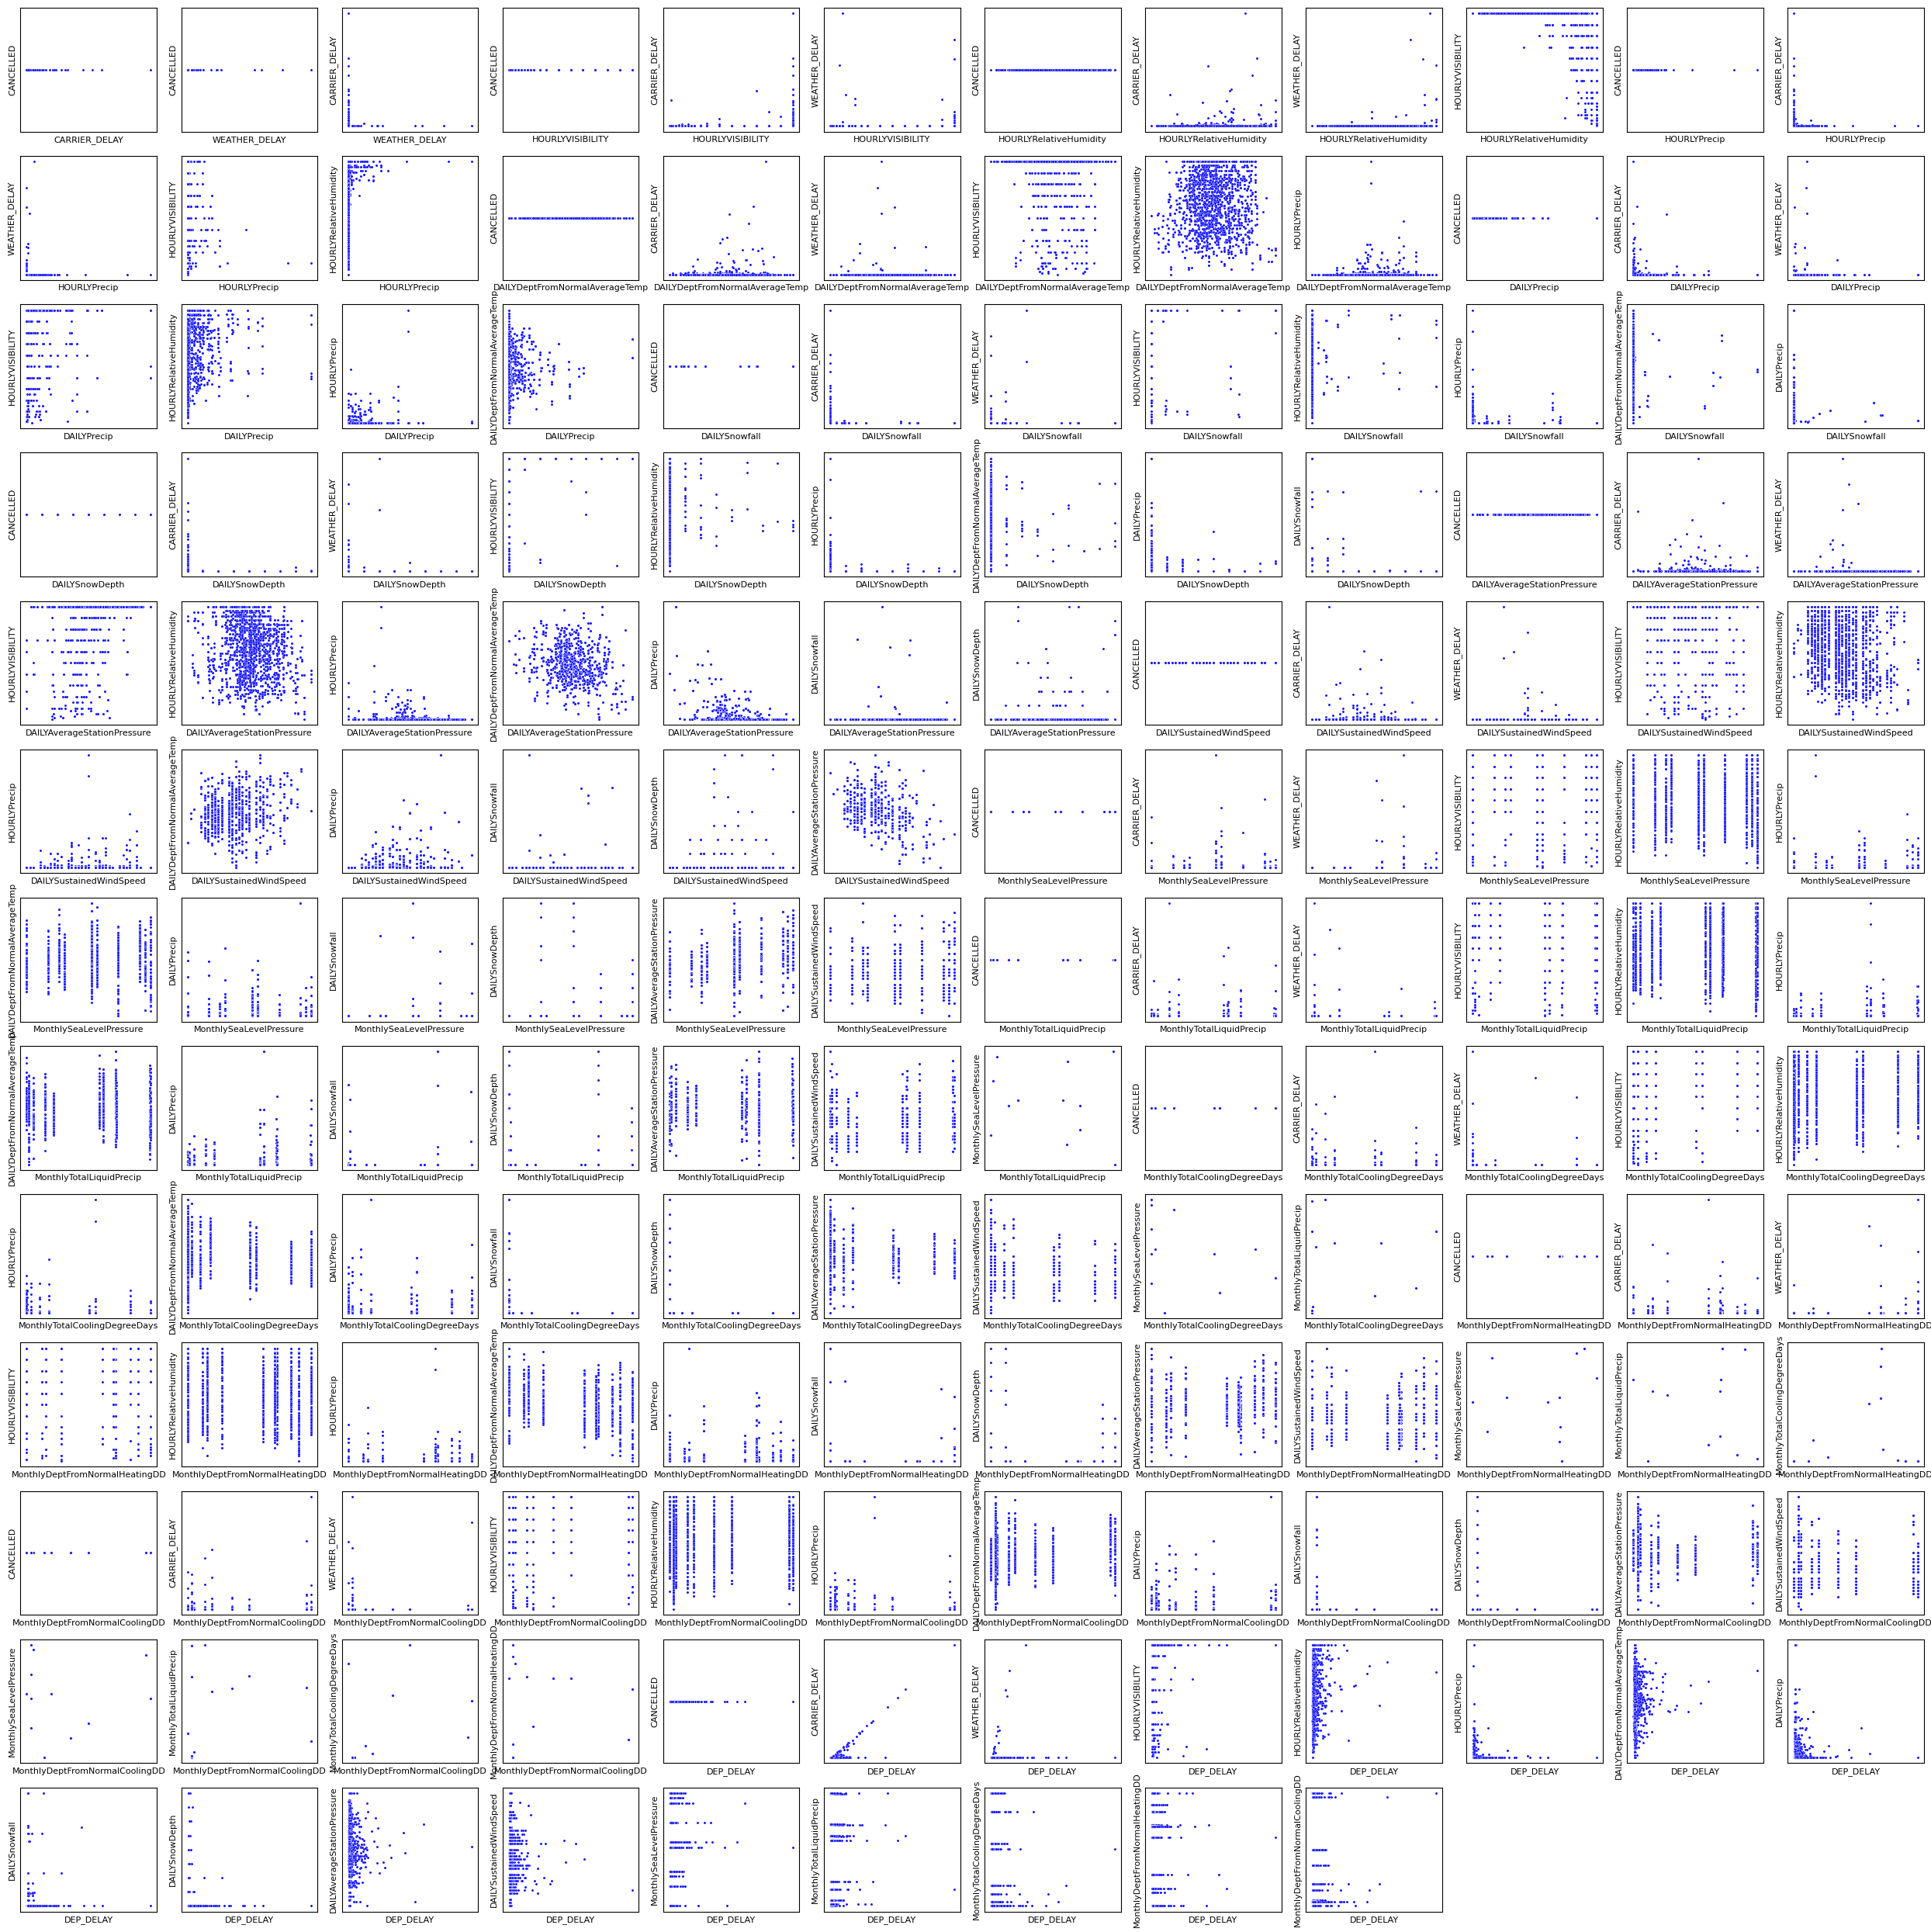

In [38]:
#Isolating the variables with a strong correlation
threshold = 0.7
strongly_correlated_pairs = []
variables_to_remove = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:  # Si la corrélation est au-dessus du seuil
            strongly_correlated_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
            variables_to_remove.add(corr_matrix.columns[j])

'''for pair in strongly_correlated_pairs:
    print(f'Variables: {pair[0]} & {pair[1]}, Corrélation: {pair[2]:.2f}')'''


#We remove some strongly correlated variables

variables_to_keep = [var for var in corr_matrix.columns if var not in variables_to_remove]
variables_to_keep.append('DEP_DELAY') #we keep DEP_DELAY because this is the variable with the most information about delays
#print("\nVariables to keep :", variables_to_keep)

# We delete the useless variables in the dataframe
plane_weather_no_corr = plane_weather[variables_to_keep]
#print(plane_weather_no_corr) #18 variables


#looking for temporal relations --> machine learning / time series
plane_weather_reduced = pd.concat([plane_weather[['Full_Departure_Datetime']], plane_weather_no_corr], axis=1)
#print(plane_weather_reduced.info())



#Scatter plots:
n_vars = 18
n_pairs = n_vars * (n_vars - 1) // 2  

# Calculations for the grid
n_cols = 12
n_rows = int(np.ceil(n_pairs / n_cols))  # Number of rows necessary

fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 25))  

# Flaten to ease indexation
axes = axes.flatten()

# counter for axes index
ax_idx = 0

# Going through all the variables
for i in range(n_vars):
    for j in range(i):  # we keep the plots for the variables below the correlation matrix to avoid repetition
        sns.scatterplot(x=plane_weather_no_corr.iloc[:, i], 
                        y=plane_weather_no_corr.iloc[:, j], 
                        ax=axes[ax_idx], 
                        color='blue', s=5)  
        axes[ax_idx].set_xlabel(plane_weather_no_corr.columns[i], fontsize=8)
        axes[ax_idx].set_ylabel(plane_weather_no_corr.columns[j], fontsize=8)
        axes[ax_idx].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        axes[ax_idx].tick_params(axis='y', which='both', left=False, right=False, labelleft=False) #delete values for the axis, we just want the name of the variable
        axes[ax_idx].tick_params(axis='both', which='both', length=0)
        
        # Next plot
        ax_idx += 1

# Mask empty axes
for i in range(ax_idx, len(axes)):
    axes[i].axis('off')

plt.tight_layout()

#plt.savefig('Avions-Retard-et-Meteo/2_Data_exploration/pictures/9_Scatter_plot.png', dpi=300)
plt.plot()

**Part 3: Machine Learning**

A MODIFIER!!!!!!!!
ICI JE PRENDS LE FICHIER DE MA LIBRAIRIE WORK ET PAS DE S3

First, we load the data

In [6]:
#Load the data
plane_weather = pd.read_excel('../Pre-Processed_data/plane_weather.xlsx')
plane_weather_for_ML = dataframes['plane_weather_for_ML.csv']
JFK_2017_number = dataframes['JFK_2017_number.csv']
weather_2017 = dataframes['weather_2017.csv']
plane_weather.drop(columns=['Unnamed: 0'], inplace=True)
plane_weather_for_ML.drop(columns=['Unnamed: 0'], inplace=True)
JFK_2017_number.drop(columns=['Unnamed: 0'], inplace=True)
weather_2017.drop(columns=['Unnamed: 0'], inplace=True)

ValueError: Excel file format cannot be determined, you must specify an engine manually.

**Part 4: Application**